In [38]:
# Import
% matplotlib inline
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import os
from sklearn import metrics
from scipy.stats import zscore
from keras.models import Sequential, Model, load_model, optimizers
from keras.layers import Dense, Activation, Input, Dropout
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

from IPython.display import display

In [2]:
def display_all(df):
    with pd.option_context("display.max_rows", 500, "display.max_columns", 500): 
        display(df)

In [3]:
# Import data
data = pd.read_csv('Scenario_Data.csv', parse_dates=['DATE'], low_memory=False)

In [4]:
display_all(data.dtypes)

DATE                                      datetime64[ns]
Equity Index_Brazil_Bovespa                      float64
Equity Index_Euro_Stoxx50                        float64
Equity Index_FTSE                                float64
Equity Index_Mex_Bolsa                           float64
Equity Index_Nikkei225                           float64
Equity Index_SPTSX60                             float64
Equity Index_SPX                                 float64
Equity Implied Vols_SPX_1M                       float64
Equity Implied Vols_SPX_3M                       float64
Equity Implied Vols_SPX_6M                       float64
Equity Implied Vols_SPX_1Y                       float64
Equity Implied Vols_SPX_2Y                       float64
Equity Implied Vols_SPTSE_1M                     float64
Equity Implied Vols_SPTSE_3M                     float64
Equity Implied Vols_SPTSE_6M                     float64
Equity Implied Vols_SPTSE_1Y                     float64
Equity Implied Vols_SPTSE_2Y   

In [5]:
data.columns = data.columns.str.replace(' ', '_')

In [6]:
data.head()

DATE  Equity_Index_Brazil_Bovespa  Equity_Index_Euro_Stoxx50  \
0 2007-01-01                     44473.71                    4119.94   
1 2007-01-02                     45382.61                    4182.12   
2 2007-01-03                     44445.29                    4188.24   
3 2007-01-04                     44019.77                    4177.76   
4 2007-01-05                     42245.16                    4129.35   

   Equity_Index_FTSE  Equity_Index_Mex_Bolsa  Equity_Index_Nikkei225  \
0              62.21                26448.32                17225.83   
1              63.11                26664.45                17225.83   
2              63.19                26619.37                17225.83   
3              62.87                26566.28                17353.67   
4              62.20                26135.60                17091.59   

   Equity_Index_SPTSX60  Equity_Index_SPX  Equity_Implied_Vols_SPX_1M  \
0                742.77           1418.30                      0.1046   
1                744.15           1418.30                      0.1051   
2                732.66           1416.63                      0.1101   
3                725.72           1418.34                      0.1095   
4                720.56           1409.71                      0.1144   

   Equity_Implied_Vols_SPX_3M               ...                \
0                      0.1224               ...                 
1                      0.1227               ...                 
2                      0.1250               ...                 
3                      0.1245               ...                 
4                      0.1279               ...                 

   Interest_Rates_EUR_SWP_SPR_5y  Interest_Rates_EUR_SWP_SPR_10y  \
0                      -0.000851                       -0.000664   
1                      -0.000947                       -0.000707   
2                      -0.000730                       -0.000494   
3                      -0.000919                       -0.000691   
4                      -0.000412                       -0.000145   

   Interest_Rates_EUR_SWP_SPR_30y  Interest_Rates_GBP_SWP_SPR_3m  \
0                       -0.001878                      -0.001439   
1                       -0.001913                      -0.001467   
2                       -0.001681                      -0.001488   
3                       -0.001843                      -0.001439   
4                       -0.001332                      -0.001414   

   Interest_Rates_GBP_SWP_SPR_6m  Interest_Rates_GBP_SWP_SPR_1y  \
0                      -0.002112                       0.002218   
1                      -0.002065                       0.002275   
2                      -0.002118                       0.002250   
3                      -0.001984                       0.002218   
4                      -0.001904                       0.002246   

   Interest_Rates_GBP_SWP_SPR_2y  Interest_Rates_GBP_SWP_SPR_5y  \
0                       0.002548                       0.003332   
1                       0.002578                       0.003268   
2                       0.002526                       0.003277   
3                       0.002514                       0.003144   
4                       0.002563                       0.002971   

   Interest_Rates_GBP_SWP_SPR_10y  Interest_Rates_GBP_SWP_SPR_30y  
0                        0.003190                        0.002598  
1                        0.003142                        0.002611  
2                        0.003155                        0.002597  
3                        0.003045                        0.002455  
4                        0.003011                        0.002498  

[5 rows x 172 columns]

In [7]:
data.shape

(2956, 172)

In [8]:
data.drop(['DATE'], axis=1, inplace=True)

In [9]:
sum(data.isnull().sum() >0)

0

In [10]:
data_sum = pd.DataFrame({"std":data.std(axis=0), "mean":data.mean(axis=0)})

In [11]:
print(data_sum.shape)
print(data_sum.head())

(171, 2)
                                     std          mean
Equity_Index_Brazil_Bovespa  9771.919777  57765.273051
Equity_Index_Euro_Stoxx50     574.740126   3088.370924
Equity_Index_FTSE               8.426045     61.122287
Equity_Index_Mex_Bolsa       8065.757235  37932.367152
Equity_Index_Nikkei225       4279.845039  14095.494841


In [12]:
# Scale data
#def mean_val = list()
#def max_val = list()
#def min_val = list()
#mean_val = np.mean(series)
#max_val = max(series)
#min_val = min(series)
def normalize(series):
    return (series - np.mean(series))/(np.std(series))
data_norm = data.apply(normalize)

In [13]:
data_norm.head()

Equity_Index_Brazil_Bovespa  Equity_Index_Euro_Stoxx50  Equity_Index_FTSE  \
0                    -1.360409                   1.795148           0.129111   
1                    -1.267382                   1.903354           0.235941   
2                    -1.363318                   1.914004           0.245437   
3                    -1.406871                   1.895767           0.207453   
4                    -1.588505                   1.811523           0.127924   

   Equity_Index_Mex_Bolsa  Equity_Index_Nikkei225  Equity_Index_SPTSX60  \
0               -1.424044                0.731537             -0.282297   
1               -1.397243                0.731537             -0.268398   
2               -1.402833                0.731537             -0.384119   
3               -1.409416                0.761412             -0.454015   
4               -1.462821                0.700166             -0.505984   

   Equity_Index_SPX  Equity_Implied_Vols_SPX_1M  Equity_Implied_Vols_SPX_3M  \
0         -0.436135                   -0.758791                   -0.772344   
1         -0.436135                   -0.753108                   -0.768412   
2         -0.439529                   -0.696278                   -0.738265   
3         -0.436053                   -0.703098                   -0.744819   
4         -0.453595                   -0.647404                   -0.700255   

   Equity_Implied_Vols_SPX_6M               ...                \
0                   -0.845711               ...                 
1                   -0.844225               ...                 
2                   -0.826387               ...                 
3                   -0.832333               ...                 
4                   -0.798143               ...                 

   Interest_Rates_EUR_SWP_SPR_5y  Interest_Rates_EUR_SWP_SPR_10y  \
0                      -2.669809                       -2.354999   
1                      -2.722762                       -2.385957   
2                      -2.603067                       -2.232608   
3                      -2.707317                       -2.374438   
4                      -2.427662                       -1.981346   

   Interest_Rates_EUR_SWP_SPR_30y  Interest_Rates_GBP_SWP_SPR_3m  \
0                       -1.115260                      -1.561391   
1                       -1.135611                      -1.569281   
2                       -1.000712                      -1.575198   
3                       -1.094909                      -1.561391   
4                       -0.797782                      -1.554347   

   Interest_Rates_GBP_SWP_SPR_6m  Interest_Rates_GBP_SWP_SPR_1y  \
0                      -1.949105                      -0.922746   
1                      -1.933778                      -0.904274   
2                      -1.951062                      -0.912376   
3                      -1.907363                      -0.922746   
4                      -1.881273                      -0.913672   

   Interest_Rates_GBP_SWP_SPR_2y  Interest_Rates_GBP_SWP_SPR_5y  \
0                      -1.140500                       0.060844   
1                      -1.125170                       0.023896   
2                      -1.151741                       0.029092   
3                      -1.157873                      -0.047689   
4                      -1.132835                      -0.147563   

   Interest_Rates_GBP_SWP_SPR_10y  Interest_Rates_GBP_SWP_SPR_30y  
0                        1.337209                        2.136283  
1                        1.309906                        2.141106  
2                        1.317301                        2.135912  
3                        1.254732                        2.083228  
4                        1.235393                        2.099181  

[5 rows x 171 columns]

In [14]:
corr = data_norm.corr()
corr.style.background_gradient()

In [15]:
train_index = data.shape[0] - 160

In [16]:
valid_index = train_index + 100

In [17]:
train_index, valid_index

(2796, 2896)

In [18]:
# convert series to supervised learning
def series_to_supervised(data, delay=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    cols, names = list(), list()
    for i in range(delay, 0, -1):
        cols.append(data.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg =  pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [19]:
lagged_data = series_to_supervised(data_norm, 3)

In [20]:
lagged_data.head()

var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3  -1.360409   1.795148   0.129111  -1.424044   0.731537  -0.282297   
4  -1.267382   1.903354   0.235941  -1.397243   0.731537  -0.268398   
5  -1.363318   1.914004   0.245437  -1.402833   0.731537  -0.384119   
6  -1.406871   1.895767   0.207453  -1.409416   0.761412  -0.454015   
7  -1.588505   1.811523   0.127924  -1.462821   0.700166  -0.505984   

   var7(t-3)  var8(t-3)  var9(t-3)  var10(t-3)     ...       var162(t-1)  \
3  -0.436135  -0.758791  -0.772344   -0.845711     ...         -2.603067   
4  -0.436135  -0.753108  -0.768412   -0.844225     ...         -2.707317   
5  -0.439529  -0.696278  -0.738265   -0.826387     ...         -2.427662   
6  -0.436053  -0.703098  -0.744819   -0.832333     ...         -2.488337   
7  -0.453595  -0.647404  -0.700255   -0.798143     ...         -2.368642   

   var163(t-1)  var164(t-1)  var165(t-1)  var166(t-1)  var167(t-1)  \
3    -2.232608    -1.000712    -1.575198    -1.951062    -0.912376   
4    -2.374438    -1.094909    -1.561391    -1.907363    -0.922746   
5    -1.981346    -0.797782    -1.554347    -1.881273    -0.913672   
6    -2.052621    -0.841391    -1.534340    -1.863011    -0.904922   
7    -1.844555    -0.648346    -1.503345    -1.795179    -0.902978   

   var168(t-1)  var169(t-1)  var170(t-1)  var171(t-1)  
3    -1.151741     0.029092     1.317301     2.135912  
4    -1.157873    -0.047689     1.254732     2.083228  
5    -1.132835    -0.147563     1.235393     2.099181  
6    -1.101154    -0.039030     1.218329     2.109941  
7    -1.109330    -0.051731     1.306494     2.148526  

[5 rows x 513 columns]

In [21]:
data_norm_proc = data_norm.shift(3).dropna()

In [22]:
data_norm_proc.head()

Equity_Index_Brazil_Bovespa  Equity_Index_Euro_Stoxx50  Equity_Index_FTSE  \
3                    -1.360409                   1.795148           0.129111   
4                    -1.267382                   1.903354           0.235941   
5                    -1.363318                   1.914004           0.245437   
6                    -1.406871                   1.895767           0.207453   
7                    -1.588505                   1.811523           0.127924   

   Equity_Index_Mex_Bolsa  Equity_Index_Nikkei225  Equity_Index_SPTSX60  \
3               -1.424044                0.731537             -0.282297   
4               -1.397243                0.731537             -0.268398   
5               -1.402833                0.731537             -0.384119   
6               -1.409416                0.761412             -0.454015   
7               -1.462821                0.700166             -0.505984   

   Equity_Index_SPX  Equity_Implied_Vols_SPX_1M  Equity_Implied_Vols_SPX_3M  \
3         -0.436135                   -0.758791                   -0.772344   
4         -0.436135                   -0.753108                   -0.768412   
5         -0.439529                   -0.696278                   -0.738265   
6         -0.436053                   -0.703098                   -0.744819   
7         -0.453595                   -0.647404                   -0.700255   

   Equity_Implied_Vols_SPX_6M               ...                \
3                   -0.845711               ...                 
4                   -0.844225               ...                 
5                   -0.826387               ...                 
6                   -0.832333               ...                 
7                   -0.798143               ...                 

   Interest_Rates_EUR_SWP_SPR_5y  Interest_Rates_EUR_SWP_SPR_10y  \
3                      -2.669809                       -2.354999   
4                      -2.722762                       -2.385957   
5                      -2.603067                       -2.232608   
6                      -2.707317                       -2.374438   
7                      -2.427662                       -1.981346   

   Interest_Rates_EUR_SWP_SPR_30y  Interest_Rates_GBP_SWP_SPR_3m  \
3                       -1.115260                      -1.561391   
4                       -1.135611                      -1.569281   
5                       -1.000712                      -1.575198   
6                       -1.094909                      -1.561391   
7                       -0.797782                      -1.554347   

   Interest_Rates_GBP_SWP_SPR_6m  Interest_Rates_GBP_SWP_SPR_1y  \
3                      -1.949105                      -0.922746   
4                      -1.933778                      -0.904274   
5                      -1.951062                      -0.912376   
6                      -1.907363                      -0.922746   
7                      -1.881273                      -0.913672   

   Interest_Rates_GBP_SWP_SPR_2y  Interest_Rates_GBP_SWP_SPR_5y  \
3                      -1.140500                       0.060844   
4                      -1.125170                       0.023896   
5                      -1.151741                       0.029092   
6                      -1.157873                      -0.047689   
7                      -1.132835                      -0.147563   

   Interest_Rates_GBP_SWP_SPR_10y  Interest_Rates_GBP_SWP_SPR_30y  
3                        1.337209                        2.136283  
4                        1.309906                        2.141106  
5                        1.317301                        2.135912  
6                        1.254732                        2.083228  
7                        1.235393                        2.099181  

[5 rows x 171 columns]

In [23]:
train_data = {}
valid_data = {}
test_data = {}

train_dep = {}
valid_dep = {}
test_dep = {}

for col_names in data_norm.columns:
    train_data[col_names] = data_norm_proc.iloc[:train_index,:].drop(col_names, axis=1)
    valid_data[col_names] = data_norm_proc.iloc[train_index:valid_index,:].drop(col_names, axis=1)
    test_data[col_names] = data_norm_proc.iloc[valid_index:,:].drop(col_names, axis=1)

    train_dep[col_names] = data_norm_proc.iloc[:train_index][col_names]
    valid_dep[col_names] = data_norm_proc.iloc[train_index:valid_index][col_names]
    test_dep[col_names] = data_norm_proc.iloc[valid_index:][col_names]

In [24]:
train_x = train_data['FX_Spot_CADUSD']
valid_x = valid_data['FX_Spot_CADUSD']
test_x = test_data['FX_Spot_CADUSD']
train_y = train_dep['FX_Spot_CADUSD']
valid_y = valid_dep['FX_Spot_CADUSD']
test_y = test_dep['FX_Spot_CADUSD']

In [25]:
print(train_x.shape, valid_x.shape, test_x.shape)

(2796, 170) (100, 170) (57, 170)


In [26]:
train_x = pd.concat([train_x, lagged_data.iloc[:train_index,:]], axis=1)
train_x.head()

Equity_Index_Brazil_Bovespa  Equity_Index_Euro_Stoxx50  Equity_Index_FTSE  \
3                    -1.360409                   1.795148           0.129111   
4                    -1.267382                   1.903354           0.235941   
5                    -1.363318                   1.914004           0.245437   
6                    -1.406871                   1.895767           0.207453   
7                    -1.588505                   1.811523           0.127924   

   Equity_Index_Mex_Bolsa  Equity_Index_Nikkei225  Equity_Index_SPTSX60  \
3               -1.424044                0.731537             -0.282297   
4               -1.397243                0.731537             -0.268398   
5               -1.402833                0.731537             -0.384119   
6               -1.409416                0.761412             -0.454015   
7               -1.462821                0.700166             -0.505984   

   Equity_Index_SPX  Equity_Implied_Vols_SPX_1M  Equity_Implied_Vols_SPX_3M  \
3         -0.436135                   -0.758791                   -0.772344   
4         -0.436135                   -0.753108                   -0.768412   
5         -0.439529                   -0.696278                   -0.738265   
6         -0.436053                   -0.703098                   -0.744819   
7         -0.453595                   -0.647404                   -0.700255   

   Equity_Implied_Vols_SPX_6M     ...       var162(t-1)  var163(t-1)  \
3                   -0.845711     ...         -2.603067    -2.232608   
4                   -0.844225     ...         -2.707317    -2.374438   
5                   -0.826387     ...         -2.427662    -1.981346   
6                   -0.832333     ...         -2.488337    -2.052621   
7                   -0.798143     ...         -2.368642    -1.844555   

   var164(t-1)  var165(t-1)  var166(t-1)  var167(t-1)  var168(t-1)  \
3    -1.000712    -1.575198    -1.951062    -0.912376    -1.151741   
4    -1.094909    -1.561391    -1.907363    -0.922746    -1.157873   
5    -0.797782    -1.554347    -1.881273    -0.913672    -1.132835   
6    -0.841391    -1.534340    -1.863011    -0.904922    -1.101154   
7    -0.648346    -1.503345    -1.795179    -0.902978    -1.109330   

   var169(t-1)  var170(t-1)  var171(t-1)  
3     0.029092     1.317301     2.135912  
4    -0.047689     1.254732     2.083228  
5    -0.147563     1.235393     2.099181  
6    -0.039030     1.218329     2.109941  
7    -0.051731     1.306494     2.148526  

[5 rows x 683 columns]

In [27]:
valid_x.head()

Equity_Index_Brazil_Bovespa  Equity_Index_Euro_Stoxx50  \
2799                     1.863706                   0.770581   
2800                     1.866774                   0.760784   
2801                     1.825853                   0.785216   
2802                     1.803889                   0.788401   
2803                     1.707037                   0.782119   

      Equity_Index_FTSE  Equity_Index_Mex_Bolsa  Equity_Index_Nikkei225  \
2799           1.380206                1.529327                1.449804   
2800           1.376645                1.541540                1.452393   
2801           1.367149                1.564083                1.461044   
2802           1.422938                1.535285                1.449119   
2803           1.411068                1.542063                1.472752   

      Equity_Index_SPTSX60  Equity_Index_SPX  Equity_Implied_Vols_SPX_1M  \
2799              1.291062          1.776065                   -1.156604   
2800              1.350484          1.779297                   -1.160013   
2801              1.394798          1.763768                   -1.149784   
2802              1.386640          1.767061                   -1.178199   
2803              1.425818          1.755759                   -1.100910   

      Equity_Implied_Vols_SPX_3M  Equity_Implied_Vols_SPX_6M  \
2799                   -1.118370                   -1.089501   
2800                   -1.128856                   -1.108826   
2801                   -1.110506                   -1.086528   
2802                   -1.106574                   -1.074636   
2803                   -1.055456                   -1.038959   

                   ...                Interest_Rates_EUR_SWP_SPR_5y  \
2799               ...                                     0.233750   
2800               ...                                     0.204516   
2801               ...                                     0.196242   
2802               ...                                     0.229337   
2803               ...                                     0.341861   

      Interest_Rates_EUR_SWP_SPR_10y  Interest_Rates_EUR_SWP_SPR_30y  \
2799                        0.922212                        1.280362   
2800                        0.884055                        1.311180   
2801                        0.877575                        1.353045   
2802                        0.958930                        1.381537   
2803                        1.055403                        1.100109   

      Interest_Rates_GBP_SWP_SPR_3m  Interest_Rates_GBP_SWP_SPR_6m  \
2799                      -0.869344                      -0.835092   
2800                      -0.868781                      -0.806068   
2801                      -0.922037                      -0.819765   
2802                      -0.933026                      -0.814221   
2803                      -0.865118                      -0.805416   

      Interest_Rates_GBP_SWP_SPR_1y  Interest_Rates_GBP_SWP_SPR_2y  \
2799                      -0.768815                      -0.542655   
2800                      -0.816453                      -0.668867   
2801                      -0.828119                      -0.638208   
2802                      -0.842378                      -0.643829   
2803                      -0.829739                      -0.643318   

      Interest_Rates_GBP_SWP_SPR_5y  Interest_Rates_GBP_SWP_SPR_10y  \
2799                      -0.044226                       -0.295263   
2800                      -0.075977                       -0.351574   
2801                      -0.049999                       -0.347593   
2802                      -0.048267                       -0.316877   
2803                      -0.063854                       -0.305501   

      Interest_Rates_GBP_SWP_SPR_30y  
2799                        0.145785  
2800                        0.116475  
2801                        0.154318  
2802                        0.169159  
2803

In [28]:
valid_x = pd.concat([valid_x, lagged_data.iloc[train_index:valid_index,:]], axis=1)

In [29]:
valid_x.shape

(100, 683)

In [30]:
train_x_vals = train_x.values
train_X = train_x_vals.reshape((train_x.shape[0],1, train_x.shape[1]))
valid_x_vals = valid_x.values
valid_X = valid_x_vals.reshape((valid_x.shape[0],1, valid_x.shape[1]))
print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape)

(2796, 1, 683) (2796,) (100, 1, 683) (100,)


In [58]:
input_layer = Input(shape=(train_X.shape[1], train_X.shape[2],), dtype='float32')
# design network

lstm_layer1 = LSTM(1000, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True, activation='linear')(input_layer)
dropout_layer = Dropout(0.1)(lstm_layer1)
lstm_layer1 = LSTM(1000, input_shape=(train_X.shape[1], 1000), return_sequences=True, activation='relu')(input_layer)
dropout_layer = Dropout(0.1)(lstm_layer1)

lstm_layer2 = LSTM(1000, input_shape=(train_X.shape[1], 500), return_sequences=True, activation='relu')(dropout_layer)
dropout_layer = Dropout(0.1)(lstm_layer2)
lstm_layer1 = LSTM(500, input_shape=(train_X.shape[1], 500), return_sequences=True, activation='relu')(input_layer)
dropout_layer = Dropout(0.1)(lstm_layer1)

lstm_layer3 = LSTM(500, input_shape=(train_X.shape[1], 100), return_sequences=True, activation='relu')(dropout_layer)
dropout_layer = Dropout(0.1)(lstm_layer3)
lstm_layer4 = LSTM(100, input_shape=(train_X.shape[1], 50), return_sequences=True, activation='relu')(dropout_layer)
dropout_layer = Dropout(0.1)(lstm_layer4)

lstm_layer5 = LSTM(50, input_shape=(train_X.shape[1], 30), return_sequences=True, activation='relu')(dropout_layer)
dropout_layer = Dropout(0.1)(lstm_layer5)
lstm_layer6 = LSTM(30, input_shape=(train_X.shape[1], 10), return_sequences=False, activation='relu')(dropout_layer)
dropout_layer = Dropout(0.1)(lstm_layer6)

output_layer = Dense(1, activation='linear')(dropout_layer)

ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mse', optimizer='adam')

ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 1, 683)            0         
_________________________________________________________________
lstm_68 (LSTM)               (None, 1, 500)            2368000   
_________________________________________________________________
dropout_68 (Dropout)         (None, 1, 500)            0         
_________________________________________________________________
lstm_69 (LSTM)               (None, 1, 500)            2002000   
_________________________________________________________________
dropout_69 (Dropout)         (None, 1, 500)            0         
_________________________________________________________________
lstm_70 (LSTM)               (None, 1, 100)            240400    
_________________________________________________________________
dropout_70 (Dropout)         (None, 1, 100)            0         
__________

In [59]:

save_weights_at  = 'CAD_USD_Price_best.hdf5'
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
fit_res = ts_model.fit(x=train_X, y=train_y, epochs=40, batch_size=128,
             verbose=1, callbacks=[save_best], validation_data=(valid_X, valid_y),
             shuffle=False)

Train on 2796 samples, validate on 100 samples
Epoch 1/40
2796/2796 [==============================] - 13s 5ms/step - loss: 0.9884 - val_loss: 1.2095
Epoch 2/40
2796/2796 [==============================] - 2s 869us/step - loss: 0.9622 - val_loss: 0.3453
Epoch 3/40
2796/2796 [==============================] - 2s 751us/step - loss: 1.2765 - val_loss: 0.0072
Epoch 4/40
2796/2796 [==============================] - 2s 722us/step - loss: 1.0884 - val_loss: 0.0881
Epoch 5/40
2796/2796 [==============================] - 2s 764us/step - loss: 0.4440 - val_loss: 0.0478
Epoch 6/40
2796/2796 [==============================] - 2s 858us/step - loss: 0.2378 - val_loss: 0.2576
Epoch 7/40
2796/2796 [==============================] - 2s 880us/step - loss: 0.2747 - val_loss: 0.0664
Epoch 8/40
2796/2796 [==============================] - 2s 810us/step - loss: 0.4352 - val_loss: 0.0164
Epoch 9/40
2796/2796 [==============================] - 2s 671us/step - loss: 0.5686 - val_loss: 0.5193
Epoch 10/40
2796/2

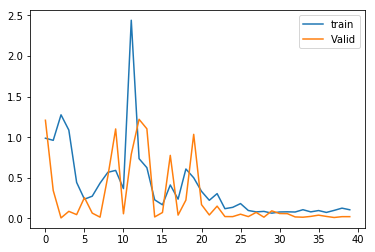

In [60]:
plt.plot(fit_res.history['loss'], label='train')
plt.plot(fit_res.history['val_loss'], label='Valid')
plt.legend()
plt.show()

In [3]:
best_model = load_model('CAD_USD_Price_best.hdf5')
preds = best_model.predict(valid_X)

NameError: name 'load_model' is not defined

In [2]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(0,100), valid_y, linestyle='-', color='r')
plt.plot(range(0,100), preds, linestyle='-', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.ylabel('price')
plt.xlabel('Index')

NameError: name 'plt' is not defined

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(valid_y, preds))
print('Test RMSE: %.3f' % rmse)

In [ ]:
def dropval(series, position=0, days=1, percent=0):
    result = np.array([])
    progress = (percent/100)/days
    print("Step of progress {}".format(progress))
    if position!=0:
        result = np.append(result, series[:position])
    if(progress==0):
        print("No drop value mentioned")
    else:
        for i in range(days):
            loc = (len(series) - (position+i+1))
            newvalue = (series[loc] - abs(series[loc] * (i+1) * progress))
            print("loc is {}".format(loc))
            print("Series original val {}".format(series[loc]))
            print(f"Series new vallue {newvalue}")
            result = np.append(result, newvalue)
            
        for i in range(days,0,-1):
            loc = (len(series) - (position+i+1+days))
            newvalue = (series[loc] - abs(series[loc] * (i+1) * progress))
            print("loc is {}".format(loc))
            print("Series original val {}".format(series[loc]))
            print(f"Series new vallue {newvalue}")
            result = np.append(result, newvalue)    
        result = np.append(result, series[(position+(2*days)):])
    return result

In [ ]:
JPY_USD_Price_org = test_x['JPY_USD_Price'].copy()
new_price = JPY_USD_Price_org.copy()

new_price = dropval(new_price,position=200,days=5,percent=20)
test_x['JPY_USD_Price'] = new_price

fig, ax=plt.subplots(dpi=3*72)
ax.plot(range(0,346),JPY_USD_Price_org,label='JPY_USD_Price_org')
ax.plot(range(0,346),new_price,label='JPY_USD_Price_new')
plt.ylabel('Std Val')
ax.legend(loc='upper left')

In [ ]:
Nikkei_225_Price_org = test_x['Nikkei_225_Price'].copy()
new_price = Nikkei_225_Price_org.copy()

new_price = dropval(new_price,position=200,days=5,percent=20)
test_x['Nikkei_225_Price'] = new_price

fig, ax=plt.subplots(dpi=3*72)
ax.plot(range(0,346),Nikkei_225_Price_org,label='Nikkei_225_Price_org')
ax.plot(range(0,346),new_price,label='Nikkei_225_Price_new')
#ax = plt.subplot(111)
plt.ylabel('Std Val')
ax.legend(loc='lower right')
#plt.show()

In [ ]:
test_x['EUR_USD_Price'].plot()

In [ ]:
EUR_USD_Price_org = test_x['EUR_USD_Price'].copy()
new_price = EUR_USD_Price_org.copy()

new_price = dropval(new_price,position=200,days=5,percent=20)
test_x['EUR_USD_Price'] = new_price

fig, ax=plt.subplots(dpi=3*72)
ax.plot(range(0,346),EUR_USD_Price_org,label='EUR_USD_Price_org')
ax.plot(range(0,346),new_price,label='EUR_USD_Price_new')
plt.ylabel('Std Val')
ax.legend(loc='lower right')


In [ ]:
test_x_vals = test_x.values
test_X = test_x_vals.reshape((test_x.shape[0],1, test_x.shape[1]))
pred2 = best_model.predict(test_X)
score = np.sqrt(metrics.mean_squared_error(pred2,test_y))
test_x['JPY_USD_Price'] = JPY_USD_Price_org
test_x['Nikkei_225_Price'] = Nikkei_225_Price_org
test_x['EUR_USD_Price'] = EUR_USD_Price_org

print("Score (RMSE): {}".format(score))

In [ ]:
print(np.sqrt(metrics.mean_squared_error(pred2,preds)))

In [ ]:
fig, ax = plt.subplots(dpi=3*72)
plt.plot(range(0,346),test_y,label='Actual')
plt.plot(range(0,346),preds,label='Prediction')
plt.plot(range(0,346), pred2,label='Prediction after Shock')
plt.ylabel('output')
ax.legend(loc='upper right')

In [ ]:
fig, ax = plt.subplots(dpi=2*72)
plt.plot(range(0,30),test_y[190:220],label='Actual')
plt.plot(range(0,30),preds[190:220],label='Prediction')
plt.plot(range(0,30), pred2[190:220],label='Prediction after Shock')
plt.ylabel('output')
ax.legend(loc='upper right')

In [ ]:
train_x = train_data['Canada_30Y_BY_Price']
test_x = test_data['Canada_30Y_BY_Price']
train_y = train_dep['Canada_30Y_BY_Price']
test_y = test_dep['Canada_30Y_BY_Price']

In [ ]:
train_x = pd.concat([train_x, lagged_data.iloc[:train_index,:]], axis=1)

In [ ]:
test_x = pd.concat([test_x, lagged_data.iloc[train_index:,:]], axis=1)

In [ ]:
train_x_vals = train_x.values
train_X = train_x_vals.reshape((train_x.shape[0],1, train_x.shape[1]))
test_x_vals = test_x.values
test_X = test_x_vals.reshape((test_x.shape[0],1, test_x.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
input_layer = Input(shape=(train_X.shape[1], train_X.shape[2],), dtype='float32')
# design network

lstm_layer1 = LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True, activation='linear')(input_layer)
dropout_layer = Dropout(0.2)(lstm_layer1)
lstm_layer2 = LSTM(50, input_shape=(train_X.shape[1], 100), return_sequences=True, activation='relu')(dropout_layer)
dropout_layer = Dropout(0.2)(lstm_layer2)
lstm_layer3 = LSTM(30, input_shape=(train_X.shape[1], 50), return_sequences=True, activation='relu')(dropout_layer)
dropout_layer = Dropout(0.2)(lstm_layer3)
lstm_layer4 = LSTM(10, input_shape=(train_X.shape[1], 30), return_sequences=False, activation='relu')(dropout_layer)
dropout_layer = Dropout(0.2)(lstm_layer4)

output_layer = Dense(1, activation='linear')(dropout_layer)

ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mae', optimizer='adam')

ts_model.summary()

In [ ]:

save_weights_at  = 'Canada_30Y_best.hdf5'
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
fit_res = ts_model.fit(x=train_X, y=train_y, epochs=50,
             verbose=1, callbacks=[save_best], validation_data=(test_X, test_y),
             shuffle=False)

In [ ]:
plt.plot(fit_res.history['loss'], label='train')
plt.plot(fit_res.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
best_model = load_model('Canada_30Y_best.hdf5')
preds = best_model.predict(test_X)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_y, preds))
print('Test RMSE: %.3f' % rmse)

In [ ]:
fig, ax = plt.subplots(dpi=3*72)
plt.plot(range(0,346), test_y, linestyle='-', color='r')
plt.plot(range(0,346), preds, linestyle='-', color='b')
plt.legend(['Actual','Predicted'], loc=2)
#plt.title('Actual vs Predicted pm2.5')
plt.ylabel('price')
plt.xlabel('Index')